<a href="https://colab.research.google.com/github/grupoadn/deep_learning_cnn_vgg16/blob/main/Image_Caption_Generetor_usando_VGG16_e_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import os

In [ ]:
# view directory from uploads colab
import os
!ls
os.getcwd()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cd gdrive/MyDrive/img_flick_8/
!ls gdrive/MyDrive/img_flick_8/

In [ ]:
!ls gdrive/MyDrive/

Adicionando o caminho dos arquivos de imagens e labels(caption) em variaveis diferentes

In [ ]:
#image_dataset_path = '/Users/arnaldocavalcanti/Documents/FIAP/Deep_Learning/base/Flickr8k_Dataset/Flicker8k_Dataset'
#caption_dataset_path = '/Users/arnaldocavalcanti/Documents/FIAP/Deep_Learning/base/Flickr8k_text/Flickr8k.token.txt'

#from google.colab import files
#image_dataset_path = files.upload()

In [ ]:
#caption_dataset_path = files.upload()

In [ ]:
caption_dataset_path

{'Flickr8k.token.txt': b'1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .\n1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .\n1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .\n1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .\n1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .\n1001773457_577c3a7d70.jpg#0\tA black dog and a spotted dog are fighting\n1001773457_577c3a7d70.jpg#1\tA black dog and a tri-colored dog playing with each other on the road .\n1001773457_577c3a7d70.jpg#2\tA black dog and a white dog with brown spots are staring at each other in the street .\n1001773457_577c3a7d70.jpg#3\tTwo dogs of different breeds looking at each other on the road .\n1001773457_577c3a7d70.jpg#4\tTwo dogs on pavement moving toward each other .\n1002674143_1b742ab4b8.jpg#0\tA little girl covered in paint sits in front of a painted ra

Abrindo uma imagem para testar

In [ ]:
# view directory from uploads colab
import os
!ls
os.getcwd()

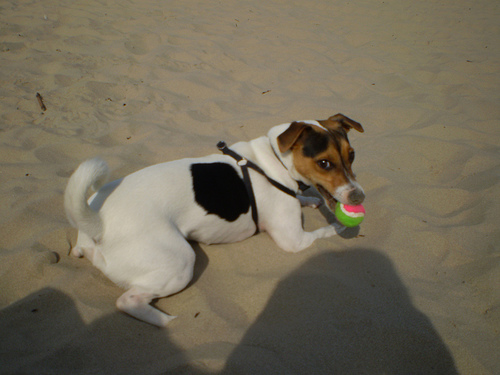

-1

In [ ]:
# Read file from google colab 


import cv2
import numpy as np
from google.colab.patches import cv2_imshow

imagen = cv2.imread('/content/gdrive/MyDrive/img_flick_8/Flicker8k_Dataset/2839532455_36a7dc4758.jpg')
cv2_imshow(imagen)
cv2.waitKey()

Caption Processor

In [ ]:
# load the caption file & read it

def load_caption_file(path):
    
    # directionary to store captions
    captions_dict = {}
    
    # itarete through the file

    for caption in open(path):
        
        # caption has format-> 1000268201_693b08cb0e.jpg#0  A child in a pink dress is climbing up a set of stairs in an entry way .
        
        tokens = caption.split()
        caption_id, caption_text = tokens[0].split('.')[0], tokens[1:]
        caption_text = ' '.join(caption_text)
        
        # save it in the captions dictionary
        if caption_id not in captions_dict:
            captions_dict[caption_id] = caption_text
            
    return captions_dict      
    

In [ ]:
# get file TXT from dir colab gDrive
import matplotlib.pyplot as plt
import os
import cv2
items = os.listdir('/content/gdrive/MyDrive/img_flick_8/Flickr8k_text/')
#print (items)  

for each_image in items:
  if each_image.endswith(".txt"):
    print (each_image)
    full_path = "/content/gdrive/MyDrive/img_flick_8/Flickr8k_text/" + each_image
    #print (full_path)



['Flickr8k.token.txt']
Flickr8k.token.txt
/content/gdrive/MyDrive/img_flick_8/Flickr8k_text/Flickr8k.token.txt


In [ ]:
# get file JPG from dir colab gDrive
import matplotlib.pyplot as plt
import os
import cv2
items = os.listdir('/content/gdrive/MyDrive/img_flick_8/Flicker8k_Dataset/')
#print (items)  

for each_image in items:
  if each_image.endswith(".jpg"):
    print (each_image)
    full_path_img = "/content/gdrive/MyDrive/img_flick_8/Flicker8k_Dataset/"
    #print (full_path_img)

A saída de streaming foi truncada nas últimas 5000 linhas.
2719102611_fef453bf30.jpg
/content/gdrive/MyDrive/img_flick_8/Flicker8k_Dataset/
271637337_0700f307cf.jpg
/content/gdrive/MyDrive/img_flick_8/Flicker8k_Dataset/
2738255684_0324ed062d.jpg
/content/gdrive/MyDrive/img_flick_8/Flicker8k_Dataset/
2711075591_f3ee53cfaa.jpg
/content/gdrive/MyDrive/img_flick_8/Flicker8k_Dataset/
2726301121_95a2fbd22b.jpg
/content/gdrive/MyDrive/img_flick_8/Flicker8k_Dataset/
2731171552_4a808c7d5a.jpg
/content/gdrive/MyDrive/img_flick_8/Flicker8k_Dataset/
270724499_107481c88f.jpg
/content/gdrive/MyDrive/img_flick_8/Flicker8k_Dataset/
2735290454_1bd8bc5eac.jpg
/content/gdrive/MyDrive/img_flick_8/Flicker8k_Dataset/
2732625904_4fbb653434.jpg
/content/gdrive/MyDrive/img_flick_8/Flicker8k_Dataset/
2698197294_ccd9327ef6.jpg
/content/gdrive/MyDrive/img_flick_8/Flicker8k_Dataset/
2702506716_17a7fb3ba4.jpg
/content/gdrive/MyDrive/img_flick_8/Flicker8k_Dataset/
2701271123_6761bc5f26.jpg
/content/gdrive/MyDrive/im

In [ ]:
# call the funcion
captions_dict = load_caption_file(full_path)


# Preprocess the captions

1) Convert the captions into lowercase

2) Tokenize the captions into different tokens

3) Remove all the punctuations from the tokens

4) add "start_index" and "end_index" as pointers to tell the model start of the caption and end of the caption

In [ ]:
# clean the captions

import string

# dictionary to store the cleaned captions
new_captions_dict = {}

# prepare translation table for removing punctuation. third argument is the list of punctuations we want to remove

table = str.maketrans('', '', string.punctuation)

# loop through the dictionary

for caption_id, caption_text in captions_dict.items():
    # tokenize the caption_text
    caption_text = caption_text.split()
    # convert it into lower case
    caption_text = [token.lower() for token in caption_text]
    # remove punctuation from each token
    caption_text = [token.translate(table) for token in caption_text]
    # remove all the single letter tokens like 'a' 's'
    caption_text = [token for token in caption_text if len(token)>1]
    
    # store the cleaned captions
    new_captions_dict[caption_id] = 'startseq ' + ' '.join(caption_text) + ' endseq'    
    

In [ ]:
# delete unwanted
del captions_dict

In [ ]:
print('"' + list(new_captions_dict.keys())[0] + '"' + ' : ' + new_captions_dict[list(new_captions_dict.keys())[0]])

"1000268201_693b08cb0e" : startseq child in pink dress is climbing up set of stairs in an entry way endseq


In [ ]:
len(new_captions_dict)

8092

In [ ]:
image_dataset_path = os.listdir('/content/gdrive/MyDrive/img_flick_8/Flicker8k_Dataset/')
#image_dataset_path

['3726168984_1fa2c8965b.jpg',
 '3759230208_1c2a492b12.jpg',
 '381514859_b40418d9c3.jpg',
 '3732728142_86364a706e.jpg',
 '384577800_fc325af410.jpg',
 '3756150099_50882fc029.jpg',
 '3736786640_70df13be2c.jpg',
 '3738789925_7d17dbdf25.jpg',
 '3745451546_fc8ec70cbd.jpg',
 '377872672_d499aae449.jpg',
 '3728164558_52729baefa.jpg',
 '3726590391_bc6e729bb6.jpg',
 '3741827382_71e93298d0.jpg',
 '3726019124_f302b3d48a.jpg',
 '3733074526_82aa8d5f8d.jpg',
 '387078972_514a38dc33.jpg',
 '3720366614_dfa8fe1088.jpg',
 '3765374230_cb1bbee0cb.jpg',
 '3730011219_588cdc7972.jpg',
 '3716277216_c04002be81.jpg',
 '3723903586_e98d3d8ec7.jpg',
 '3737539561_d1dc161040.jpg',
 '3737711435_113ccd0a52.jpg',
 '390992102_67fa31b22f.jpg',
 '380527679_574749123d.jpg',
 '3725353555_75c346d7ec.jpg',
 '373219198_149af371d9.jpg',
 '379006645_b9a2886b51.jpg',
 '3724718895_bd03f4a4dc.jpg',
 '3726730085_2468ee9220.jpg',
 '3758787457_1a903ee1e9.jpg',
 '378170167_9b5119d918.jpg',
 '390987167_2d5905b459.jpg',
 '386656845_4e77c3e3

# Make a list of only those images who has caption

In [ ]:
caption_images_list = []

image_index = list(new_captions_dict.keys())

caption_images_list = [ image.split('.')[0] for image in os.listdir('/content/gdrive/MyDrive/img_flick_8/Flicker8k_Dataset/') if image.split('.')[0] in image_index ]

In [ ]:
caption_images_list[0]

'3726168984_1fa2c8965b'

In [ ]:
len(caption_images_list)

8091

# Make training, validation and test data

taking 7081 images for training, 1000 for validation and rest 10 for testing

In [ ]:
train_validate_images = caption_images_list[0:7081]
len(train_validate_images)

7081

In [ ]:
test_images = caption_images_list[7082:8091]
#test_images

['114949897_490ca7eaec',
 '118309463_a532b75be9',
 '1206506157_c7956accd5',
 '1178705300_c224d9a4f1',
 '1177994172_10d143cb8d',
 '1174525839_7c1e6cfa86',
 '111497985_38e9f88856',
 '1117972841_2b9261f95f',
 '1096395242_fc69f0ae5a',
 '1160441615_fe6b3c5277',
 '1220401002_3f44b1f3f7',
 '1079274291_9aaf896cc1',
 '10815824_2997e03d76',
 '1287073593_f3d2a62455',
 '1332823164_c70a5d930e',
 '1232148178_4f45cc3284',
 '1308472581_9961782889',
 '1342766791_1e72f92455',
 '1303727828_d1052ee341',
 '1312227131_771b5ed201',
 '1329832826_432538d331',
 '1263126002_881ebd7ac9',
 '130211457_be3f6b335d',
 '1267711451_e2a754b4f8',
 '1287475186_2dee85f1a5',
 '1236951314_0308dc4138',
 '1348957576_c4a78eb974',
 '1255504166_f2437febcb',
 '1303548017_47de590273',
 '1262583859_653f1469a9',
 '1287931016_fb015e2e10',
 '129599450_cab4e77343',
 '1348891916_ebd4413033',
 '133905560_9d012b47f3',
 '1231229740_8dcbf80bfb',
 '1247181182_35cabd76f3',
 '127488876_f2d2a89588',
 '1332815795_8eea44375e',
 '1248357227_2b4175fc

# Image Feature Extractor

extract_features function extracts the important features out of the images passed using VGG16 model.

In [ ]:
# extract features from each photo in the directory
def extract_features(directory, image_keys):
    # load the model
    model = VGG16()
    
    # re-structure the model
    model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
    
    # summarize
    print(model.summary())
    
    # extract features from each photo
    features = dict()
    
    for name in image_keys:
        
        # load an image from file
        filename = directory + '/' + name + '.jpg'
        
        # load the image and convert it into target size of 224*224
        from PIL import ImageFile
        ImageFile.LOAD_TRUNCATED_IMAGES = True
        image = load_img(filename, target_size=(224, 224))
        
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        
        # reshape data for the model
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        
        # prepare the image for the VGG model
        image = preprocess_input(image)
        
        # get features
        feature = model.predict(image, verbose=0)
        
        # get image id
        image_id = name.split('.')[0]
        
        # store feature
        features[image_id] = feature
        
#         print('>%s' % name)
        

    return features

In [ ]:
# extracting image features for train_validate_images
train_validate_features = extract_features(full_path_img, train_validate_images)

553467904/553467096 [==============================] - 4s 0us/step
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_____________________________________________________

In [ ]:
print("{} : {}".format(list(train_validate_features.keys())[0], train_validate_features[list(train_validate_features.keys())[0]] ))

3726168984_1fa2c8965b : [[0.73527956 0.         0.         ... 0.7041966  0.         0.        ]]


In [ ]:
len(train_validate_features)

7081

In [ ]:
from pickle import dump
dump(train_validate_features, open('./train_validate_features.pkl', 'wb'))

# Preparing the input data


Each caption will be split into words. The model will be provided one word and the photo and generate the next word. Then the first two words of the description will be provided to the model as input with the image to generate the next word. This is how the model will be trained. So we will have two features, x1 (image) , x2 (text_sequence) and one target variable, y (generated_word).

Image, text sequence, generated_word

photo startseq, little

photo startseq, little, girl

photo startseq, little, girl, running

photo startseq, little, girl, running, in

photo startseq, little, girl, running, in, field

photo startseq, little, girl, running, in, field, endseq

In [ ]:
# load libraries
import numpy as np
import keras,os
from keras.models import Sequential
from keras.models import Model, load_model
from keras.layers import Input, Dense, Dropout, LSTM, Embedding, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical, plot_model
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
# make a dictionary of image with caption for train_validate_images
train_validate_image_caption = {}

for image, caption in new_captions_dict.items():
    
    # check whether the image is available in both train_validate_images list and train_validate_features dictionary
    if image in train_validate_images and image in list(train_validate_features.keys()):
        
         train_validate_image_caption.update({image : caption})

len(train_validate_image_caption)

7081

# make sure the correct caption is mapped with the correct image

In [ ]:
list(train_validate_image_caption.values())[1]

'startseq bulldog sheep dog and boxer standing in yard endseq'

In [ ]:
list(train_validate_image_caption.keys())[1]

'1082252566_8c79beef93'

In [ ]:
print(full_path_img+'1001773457_577c3a7d70'+'.jpg')

/content/gdrive/MyDrive/img_flick_8/Flicker8k_Dataset/1001773457_577c3a7d70.jpg


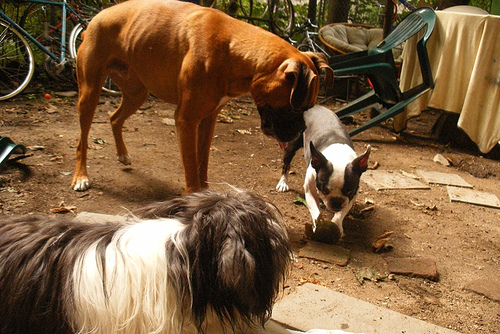

In [ ]:
from IPython.display import Image
Image(full_path_img+list(train_validate_image_caption.keys())[1]+'.jpg')


In [ ]:
# initialise tokenizer
tokenizer = Tokenizer()

# create word count dictionary on the captions list
tokenizer.fit_on_texts(list(train_validate_image_caption.values()))

# how many words are there in the vocabulary? store the total length in vocab_len and add 1 because word_index starts with 1 not 0 
vocab_len = len(tokenizer.word_index) + 1

# store the length of the maximum sentence
max_len = max(len(train_validate_image_caption[image].split()) for image in train_validate_image_caption)

def prepare_data(image_keys):
    
    # x1 will store the image feature, x2 will store one sequence and y will store the next sequence
    x1, x2, y = [], [], []

    # iterate through all the images 
    for image in image_keys:

        # store the caption of that image
        caption = train_validate_image_caption[image]

        # split the image into tokens
        caption = caption.split()

        # generate integer sequences of the
        seq = tokenizer.texts_to_sequences([caption])[0]

        length = len(seq)

        for i in range(1, length):

            x2_seq, y_seq = seq[:i] , seq[i]  

            # pad the sequences
            x2_seq = pad_sequences([x2_seq], maxlen = max_len)[0]


            # encode the output sequence                
            y_seq = to_categorical([y_seq], num_classes = vocab_len)[0]

            x1.append( train_validate_features[image][0] )

            x2.append(x2_seq)

            y.append(y_seq)
               
    return np.array(x1), np.array(x2), np.array(y)

In [ ]:
len(train_validate_images)

7081

In [ ]:
train_x1, train_x2, train_y = prepare_data( train_validate_images[0:6081] )
validate_x1, validate_x2, validate_y = prepare_data( train_validate_images[6081:7081] )

In [ ]:
len(train_x1)

62082

In [ ]:
len(validate_x1)

10143

# Final Model

# Model architecture

In [ ]:
# feature extractor model
input_1 = Input(shape=(4096,))
droplayer = Dropout(0.5)(input_1)
denselayer = Dense(256, activation='relu')(droplayer)

# sequence model
input_2 = Input(shape=(max_len,))
embedding = Embedding(vocab_len, 256, mask_zero=True)(input_2)
droplayer_ = Dropout(0.5)(embedding)
lstm = LSTM(256)(droplayer_)

# decoder model
decoder1 = add([denselayer, lstm])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_len, activation='softmax')(decoder2)

# tie it together [image, seq] [word]
model = Model(inputs=[input_1, input_2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# summarize model
print(model.summary())


Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 29)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 4096)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 29, 256)      1072384     input_3[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 4096)         0           input_2[0][0]                    
_______________________________________________________________________________________

In [ ]:
# model = Sequential()
# model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Flatten())
# model.add(Dense(units=4096,activation="relu"))
# model.add(Dense(units=4096,activation="relu"))
# model.add(Dense(units=2, activation="softmax"))

In [ ]:
# from keras.optimizers import Adam
# opt = Adam(lr=0.001)
# model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
# model.summary()

In [ ]:
# # fit model
# history = model.fit([train_x1, train_x2],  
#                     train_y,              
#                     verbose = 1,            
#                     epochs = 50,            
#                     callbacks = callbacks, 
#                     validation_data=([validate_x1, validate_x2], validate_y)) 

In [ ]:
# from keras.callbacks import ModelCheckpoint, EarlyStopping
# checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
# hist = model.fit_generator(steps_per_epoch=100,generator=traindata, validation_data= testdata, validation_steps=10,epochs=100,callbacks=[checkpoint,early])

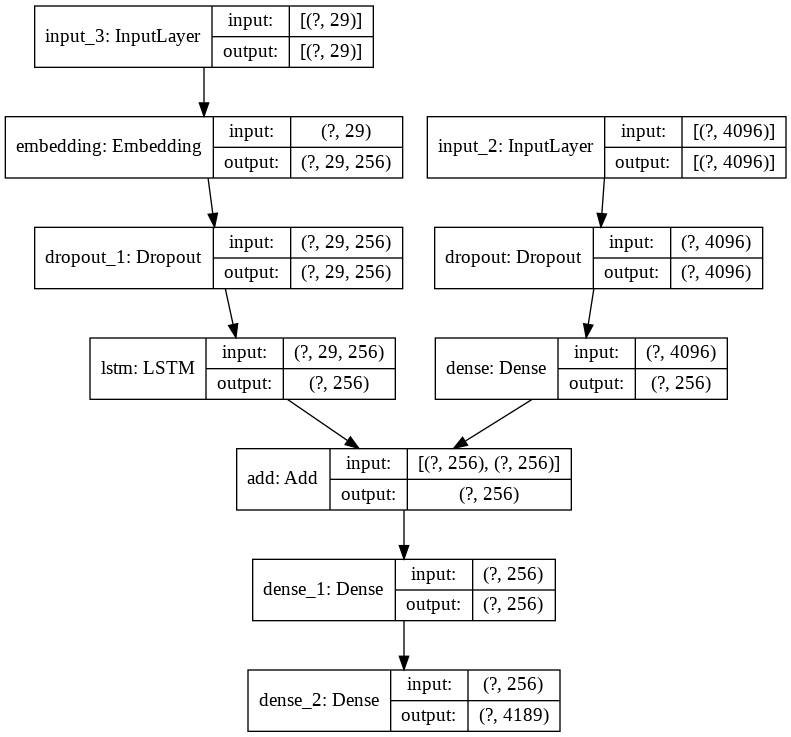

In [ ]:
#Exibindo o modelo graficamente
# OBS:Foi preciso aqui instalar o pydot e pydotplus do anaconda novamente para funcionar

import keras.utils.vis_utils
from importlib import reload
reload(keras.utils.vis_utils)
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
# define checkpoint callback
filepath = './model-ep{epoch:02d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5'

callbacks = [
             ModelCheckpoint(filepath= filepath, save_best_only=True, monitor='val_loss') ]

In [ ]:
print("shape of train_x1 ", train_x1.shape)
print("shape of train_x2 ", train_x2.shape)
print("shape of train_y ", train_y.shape)
print()
print("shape of validate_x1 ", validate_x1.shape)
print("shape of validate_x2 ", validate_x2.shape)
print("shape of validate_y ", validate_y.shape)

shape of train_x1  (62082, 4096)
shape of train_x2  (62082, 29)
shape of train_y  (62082, 4189)

shape of validate_x1  (10143, 4096)
shape of validate_x2  (10143, 29)
shape of validate_y  (10143, 4189)


In [ ]:
# fit model
history = model.fit([train_x1, train_x2],  
                    train_y,              
                    verbose = 1,            
                    epochs = 50,            
                    callbacks = callbacks, 
                    validation_data=([validate_x1, validate_x2], validate_y)) 

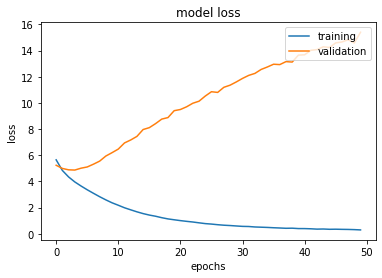

In [ ]:
# plot training loss and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [ ]:
# saving the model with last parameter 
model.save('./latest_model.h5')

In [ ]:
def extract_feat(filename):
    # load the model
    model = VGG16()
    # re-structure the model
    model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
    # load the photo
    image = load_img(filename, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # get features
    feature = model.predict(image, verbose=0)
    return feature

# map an integer to a word
def word_for_id(integer, tokenizr):
    for word, index in tokenizr.word_index.items():
        if index == integer:
            return word
    return None

In [ ]:
# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
    # seed the generation process
    in_text = 'startseq'
    # iterate over the whole length of the sequence
    for i in range(max_length):
        # integer encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad input
        sequence = pad_sequences([sequence], maxlen=max_length)
        # predict next word
        yhat = model.predict([photo,sequence], verbose=0)
        # convert probability to integer
        yhat = np.argmax(yhat)
        # map integer to word
        word = word_for_id(yhat, tokenizer)
        # stop if we cannot map the word
        if word is None:
            break
        # append as input for generating the next word
        in_text += ' ' + word
        # stop if we predict the end of the sequence
        if word == 'endseq':
            break
    return in_text

# Avaliando o TREINO

In [ ]:
from keras.models import load_model
# load the model
modl = load_model('/content/latest_model.h5')

# generate description
tokenizr = Tokenizer()
tokenizr.fit_on_texts([caption for image, caption in new_captions_dict.items() if image in train_validate_images])
max_length = 29

for count in range(10):

    photo = extract_feat('{}.jpg'.format(full_path_img+'/'+train_validate_images[count]))  

    # generate description
    description = generate_desc(modl, tokenizr, photo, max_length)
    print("Predicted caption -> ", description)
    print()
    print("Actual caption -> ", new_captions_dict[train_validate_images[count]])
    print('*********************************************************************')
    print()

OSError: ignored

# Avaliando o TESTE





In [ ]:
# load the model
modl = load_model('/content/latest_model.h5')

# generate description
tokenizr = Tokenizer()
tokenizr.fit_on_texts([caption for image, caption in new_captions_dict.items() if image in test_images])
max_length = 29

for count in range(10):

    photo = extract_feat('{}.jpg'.format(full_path_img+'/'+test_images[count]))  

    # generate description
    description = generate_desc(modl, tokenizr, photo, max_length)
    print("Predicted caption -> ", description)
    print()
    print("Actual caption -> ", new_captions_dict[test_images[count]])
    print('*********************************************************************')
    print()

ResourceExhaustedError: ignored